## Lista 2 - Tópicos Especiais em Cosmologia e Astrofísica

2022

Andressa Wille

__________________________

bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv #funções de Bessel

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15

#### 1) Oscilações verticais

d)

In [3]:
rho = 0.15 # Msun/pc³

In [4]:
Msun = 1.989e30 #kg
pc_3 = 2.938e49 #m³ 

In [5]:
rho_new = rho*Msun/pc_3 #kg/m³
rho_new

1.0154867256637167e-20

In [6]:
G = 6.67e-11 #m³ kg⁻¹ s⁻¹

In [7]:
w = (np.sqrt(4*np.pi*G*rho_new))
P = (2*np.pi)/w
P #s

2153648852548418.2

In [11]:
w

2.917460429886087e-15

In [8]:
P_new = P/3.154e7
P_new #ano

68283096.14928403

e)

In [14]:
z_sun = 30 * 3.086e16 #km
w_sun = 7.2 #km/s
wt = np.arctan(w*z_sun/w_sun)
wt

1.5681306387947476

In [15]:
z_sun = 30 #kpc
z0 = z_sun/np.sin(wt)
z0 #kpc

30.0001065887033

#### 2) Velocidade circular do disco exponencial

a)

In [37]:
Md = 5 # 1e10 Msun
Rd = 3.5 #kpc 

In [38]:
R = np.arange(1e-3, 100, 0.1)

In [40]:
sigma_0 = Md/(2*np.pi*Rd**2)
y = R/(2*Rd)

In [41]:
G = 43007.1 #kpc (km/s)² (1e10 Msun)⁻¹

In [43]:
I0 = iv(0, y)
I1 = iv(1, y)

K0 = kv(0, y)
K1 = kv(1, y)

In [44]:
vc_2 = (4*np.pi*G*sigma_0*Rd*y**2)*(I0*K0-I1*K1)
vc = np.sqrt(vc_2)

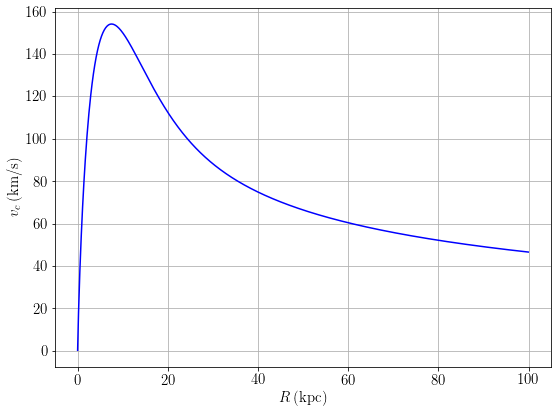

In [48]:
plt.figure(figsize=[8,6])
plt.plot(R, vc, 'b-')
plt.xlabel('$R \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$v_{c} \, \mathrm{(km/s)}$', fontsize=15)
#plt.title('', fontsize=15)
#plt.xlim(x1, x2)
plt.grid()
plt.tight_layout()

b)

In [49]:
m, x, y, z = np.loadtxt('disk.txt', usecols=(0,1,2,3), unpack=True)

In [50]:
R = np.sqrt(x**2 + y**2 + z**2)

M_r = []
r = []
v_circ = []
M = v_c = 0

Rmin = 0.0
Rmax = 100.0
Nbins = 1000
dR = (Rmax - Rmin)/Nbins

for i in range(0, Nbins):
    R1 = i * dR
    R2 = R1 + dR
    r.append((R2))

    cond = np.argwhere((R<R2)).flatten()
    M = sum(m[cond])
    M_r.append(M)
    
    v_c = (np.sqrt(G*M_r[i]/r[i]))
    v_circ.append(v_c)

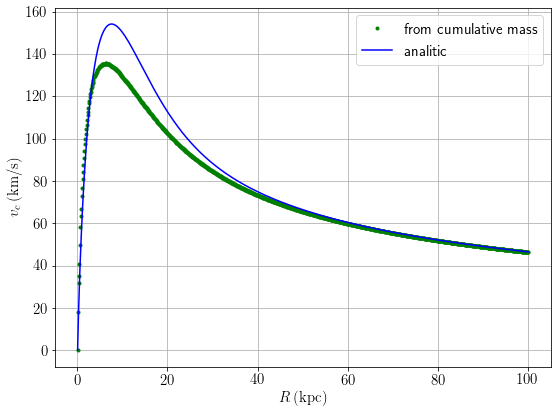

In [51]:
plt.figure(figsize=[8,6])
plt.plot(r, v_circ, 'g.', label='from cumulative mass')
plt.plot(r, vc, 'b-', label='analitic')
plt.xlabel('$R \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$v_{c} \, \mathrm{(km/s)}$', fontsize=15)
#plt.title('', fontsize=15)
#plt.xlim(x1, x2)
plt.grid()
plt.legend()
plt.tight_layout()

#### 4) Ressonâncias de Lindblad

In [3]:
G = 43007.1

In [4]:
for j in range (0,5,1):
    index = str(j).zfill(4)
    doc = f'data/disk_{index}.txt'
    doc2 = f'data/halo_{index}.txt'
    
    m_disk, x_disk, y_disk, z_disk = np.loadtxt(doc, usecols=(0,1,2,3), unpack=True)
    m_halo, x_halo, y_halo, z_halo = np.loadtxt(doc2, usecols=(0,1,2,3), unpack=True)
    
    cm_x_disk = sum(m_disk*x_disk)/sum(m_disk)
    cm_y_disk = sum(m_disk*y_disk)/sum(m_disk)
    cm_z_disk = sum(m_disk*z_disk)/sum(m_disk)

    x_new_disk = x_disk - cm_x_disk
    y_new_disk = y_disk - cm_y_disk
    z_new_disk = z_disk - cm_z_disk

    cm_x_halo = sum(m_halo*x_halo)/sum(m_halo)
    cm_y_halo = sum(m_halo*y_halo)/sum(m_halo)
    cm_z_halo = sum(m_halo*z_halo)/sum(m_halo)

    x_new_halo = x_halo - cm_x_halo
    y_new_halo = y_halo - cm_y_halo
    z_new_halo = z_halo - cm_z_halo

    R_disk = np.sqrt(x_new_disk**2 + y_new_disk**2 + z_new_disk**2)
    R_halo = np.sqrt(x_new_halo**2 + y_new_halo**2 + z_new_halo**2)

    M_r_disk = []
    M_r_halo = []
    M_r = []
    r = []
    v_circ = []
    v_c_disk = []
    v_c_halo = []
    omega = []
    M_disk = M_halo = 0

    Rmin = 0.0
    Rmax = 100.0
    Nbins = 500
    dR = (Rmax - Rmin)/Nbins

    for i in range(0, Nbins):
        R1 = i * dR
        R2 = R1 + dR
        r.append(R2)

        cond1 = np.argwhere(R_disk<=R2).flatten()
        M_disk = sum(m_disk[cond1])
        M_r_disk.append(M_disk)

        cond2 = np.argwhere(R_halo<=R2).flatten()
        M_halo = sum(m_halo[cond2])
        M_r_halo.append(M_halo)

        v_c_disk.append(np.sqrt(G*M_r_disk[i]/r[i]))
        v_c_halo.append(np.sqrt(G*M_r_halo[i]/r[i]))

        M_r.append(M_r_disk[i] + M_r_halo[i])

        v_c = (np.sqrt(G*M_r[i]/r[i]))
        v_circ.append(v_c)
        omega.append(v_c/r[i])
      
    out = np.transpose([r, v_circ, omega])
    name = f'omega_{index}.txt'
    np.savetxt(name, out, header='R       v circ       omega', fmt='%1.6e')
        

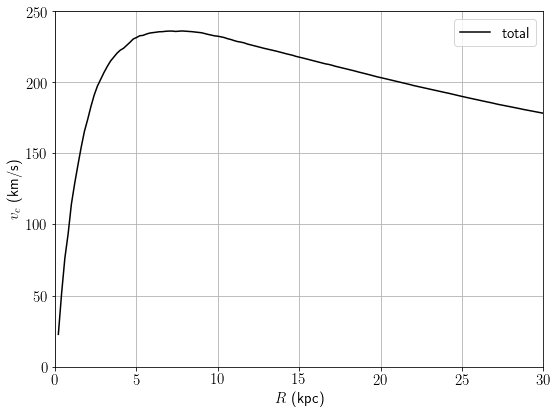

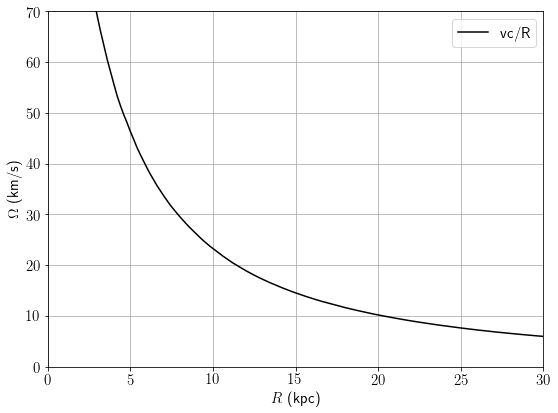

In [5]:
index = '0000'
r, v_circ, omega = np.loadtxt(f'omega_{index}.txt', usecols=(0,1,2), unpack=True)

plt.figure(figsize=[8,6])
plt.plot(r, v_circ, 'k-', label='total')
plt.xlabel('$R$ (kpc)', fontsize=15)
plt.ylabel('$v_{c}$ (km/s)', fontsize=15)
#plt.title('', fontsize=15)
plt.xlim(0, 30)
plt.ylim(0, 250)
plt.grid()
plt.legend()
plt.tight_layout()

plt.figure(figsize=[8,6])
plt.plot(r, omega, 'k-', label='vc/R')
plt.xlabel('$R$ (kpc)', fontsize=15)
plt.ylabel('$\Omega$ (km/s)', fontsize=15)
#plt.title('', fontsize=15)
plt.xlim(0, 30)
plt.ylim(0, 70)
plt.grid()
plt.legend()
plt.tight_layout()

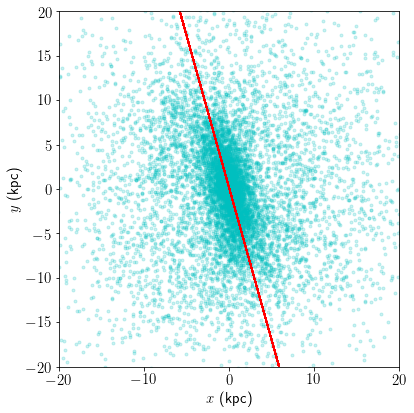

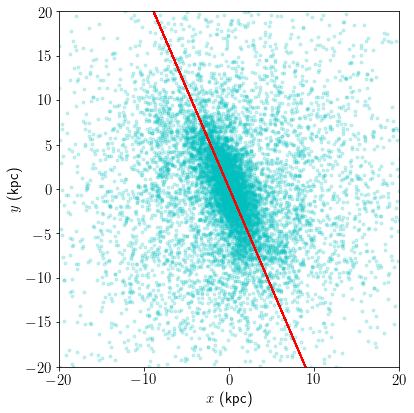

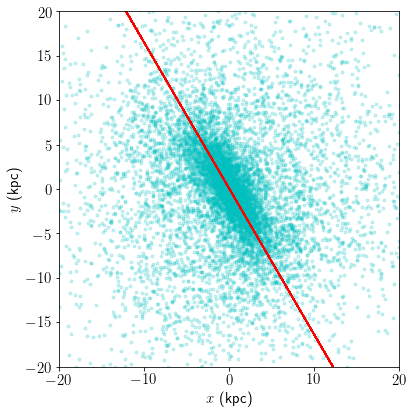

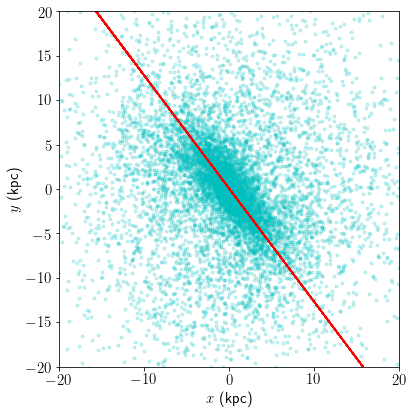

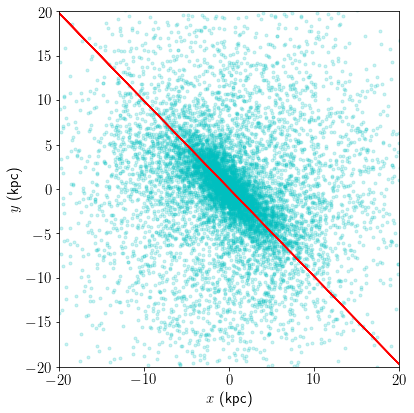

In [6]:
thetas = np.empty(5)

for j in range (0,5,1):
    index = str(j).zfill(4)
    doc = f'data/disk_{index}.txt'
    
    m_disk, x_disk, y_disk, z_disk = np.loadtxt(doc, usecols=(0,1,2,3), unpack=True)
    
    cm_x_disk = sum(m_disk*x_disk)/sum(m_disk)
    cm_y_disk = sum(m_disk*y_disk)/sum(m_disk)

    x_new_disk = x_disk - cm_x_disk
    y_new_disk = y_disk - cm_y_disk
    
    R = np.sqrt(x_new_disk**2 + y_new_disk**2)
    theta = np.arctan(y_new_disk/x_new_disk)
    
    out = np.transpose([m_disk, R, theta])
    name = f'theta_{index}.txt'
    np.savetxt(name, out, header='m       R       theta', fmt='%1.6e')
    
    m, R, theta = np.loadtxt(f'theta_{index}.txt', usecols=(0,1,2), unpack=True)
    
    Rmax = 10.0 #mais ou menos até onde a barra é mais visível
    cond = np.argwhere(R<Rmax).flatten()
    a2 = sum(m[cond] * np.cos(2*theta[cond]))
    b2 = sum(m[cond] * np.sin(2*theta[cond]))
    
    theta_b = (1/2)*np.arctan2(b2,a2)
    theta_b_graus = theta_b *180/np.pi #graus
    thetas[j] = theta_b
    
    a = 1/np.tan((np.pi/2)-abs(theta_b))
    
    plt.figure(figsize=[6,6])
    plt.plot(x_new_disk, y_new_disk, '.', alpha=0.2, color='c')

    x = np.linspace(-20, 20, 1)
    linha = -a * x_new_disk

    plt.plot(x_new_disk, linha, 'r-')
    plt.xlabel('$x$ (kpc)', fontsize=15)
    plt.ylabel('$y$ (kpc)', fontsize=15)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.tight_layout()

In [7]:
thetas

array([-1.28679611, -1.1510792 , -1.0244493 , -0.90565559, -0.77970939])

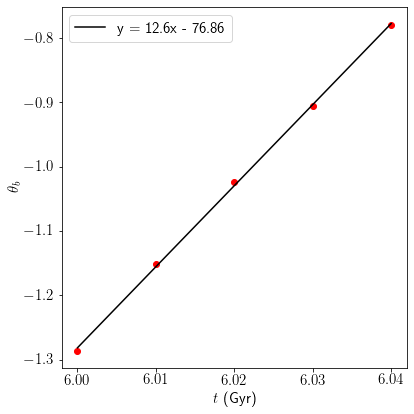

In [8]:
times = [6.00, 6.01, 6.02, 6.03, 6.04]
plt.figure(figsize=[6,6])
plt.plot(times, thetas, 'ro')

deg = 1
func = np.polyfit(times, thetas, deg)
reta = np.poly1d(func)

cons = (reta.c)

a = cons[0]
b = -cons[1]

plt.plot(times, reta(times), "k-", label = f'y = {round(a,2)}x - {round(b,2)}')

plt.xlabel('$t$ (Gyr)', fontsize=15)
plt.ylabel(r'$\theta_b$', fontsize=15)
plt.legend(loc='upper left')
plt.tight_layout()

In [9]:
omega_b = a

In [10]:
omega_b

12.595970562897534

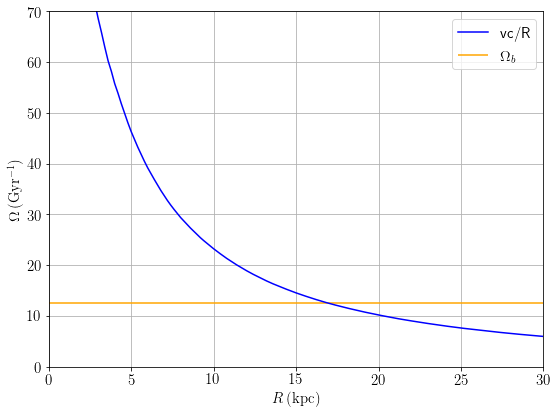

In [11]:
index = '0002'
r, v_circ, omega = np.loadtxt(f'omega_{index}.txt', usecols=(0,1,2), unpack=True)

plt.figure(figsize=[8,6])
plt.plot(r, omega, 'b-', label='vc/R')
plt.hlines(omega_b, 0, 30, colors='orange', label= '$\Omega_b$')

plt.xlabel('$R \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$\Omega \, \mathrm{(Gyr^{-1})}$', fontsize=15)
#plt.title('', fontsize=15)
plt.xlim(0, 30)
plt.ylim(0, 70)
plt.grid()
plt.legend()
plt.tight_layout()

In [12]:
omega_2 = omega**2

In [13]:
deriv = np.diff(omega_2)/np.diff(r)

In [14]:
R = r[0:499]
omega_2 = omega_2[0:499]
omega = omega[0:499]

In [15]:
kappa = np.sqrt(R*deriv + 4*omega_2)

In [16]:
ilr = omega - (kappa/2)
olr = omega + (kappa/2)


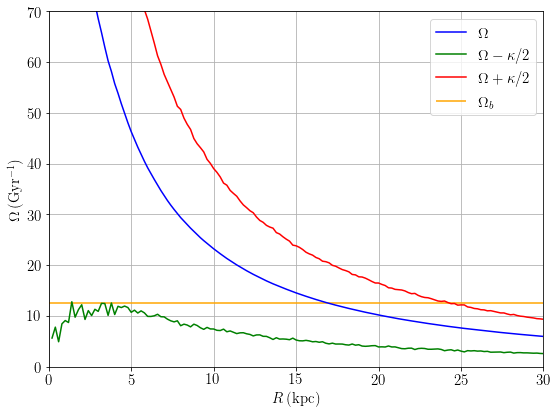

In [17]:
index = '0002'
r, v_circ, omega = np.loadtxt(f'omega_{index}.txt', usecols=(0,1,2), unpack=True)

plt.figure(figsize=[8,6])
plt.plot(r, omega, 'b-', label='$\Omega$')
plt.plot(R, ilr, 'g-', label='$\Omega - \kappa/2$')
plt.plot(R, olr, 'r-', label='$\Omega + \kappa/2$')
plt.hlines(omega_b, 0, 30, colors='orange', label= '$\Omega_b$')

plt.xlabel('$R \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$\Omega \, \mathrm{(Gyr^{-1})}$', fontsize=15)
#plt.title('', fontsize=15)
plt.xlim(0, 30)
plt.ylim(0, 70)
plt.grid()
plt.legend()
plt.tight_layout()

In [18]:
r_c = r[np.where(omega_b <= omega)[0]].max()
r_ilr = r[np.where(omega_b <= ilr)[0]].max()
r_olr = r[np.where(omega_b <= olr)[0]].max()
print(r_c, r_ilr, r_olr)

16.8 1.4 24.2


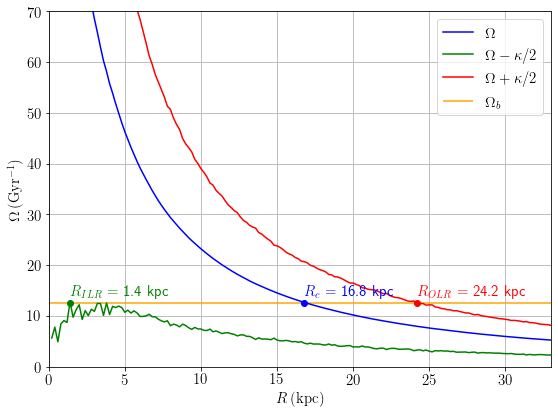

In [39]:
index = '0002'
r, v_circ, omega = np.loadtxt(f'omega_{index}.txt', usecols=(0,1,2), unpack=True)

plt.figure(figsize=[8,6])

plt.plot(r, omega, 'b-', label='$\Omega$')
plt.plot(R, ilr, 'g-', label='$\Omega - \kappa/2$')
plt.plot(R, olr, 'r-', label='$\Omega + \kappa/2$')
plt.hlines(omega_b, 0, 33, colors='orange', label= '$\Omega_b$')

plt.plot(r_c, omega_b, 'bo')
plt.plot(r_ilr, omega_b, 'go')
plt.plot(r_olr, omega_b, 'ro')

plt.annotate(f'$R_c$ = {r_c} kpc', xy=(r_c, 14), fontsize=15, color='blue') 
plt.annotate(f'$R_{{ILR}}$ = {r_ilr} kpc', xy=(r_ilr, 14), fontsize=15, color='green') 
plt.annotate(f'$R_{{OLR}}$ = {r_olr} kpc', xy=(r_olr, 14), fontsize=15, color='red') 

plt.xlabel('$R \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$\Omega \, \mathrm{(Gyr^{-1})}$', fontsize=15)
#plt.title('', fontsize=15)
plt.xlim(0, 33)
plt.ylim(0, 70)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('2-4.png')